In [ ]:
%%capture --no-stderr

!pip install --quiet -U langgraph

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
  prompt:str

In [ ]:
test1 : State  = State(prompt="Hello World")

In [ ]:
print(test1)
print(test1['prompt'])
print(test1['prompt']  +" I am")
print(type(test1))

{'prompt': 'Hello World'}
Hello World
Hello World I am
<class 'dict'>


In [ ]:
def node_1 (state: State) -> State:
  print('node 1 ============= > ', State)
  return {'prompt': state['prompt'] + ' I am'}


def node_2(state: State) -> State:
  print('node 2 ============= > ', State)
  return{'prompt': state['prompt']+ ' happy!'}

In [ ]:
from IPython.display import display , Image

from langgraph.graph import StateGraph, START ,END
from langgraph.graph.state import CompiledStateGraph


builder : StateGraph = StateGraph(state_schema=State)

In [ ]:
print(builder)

In [ ]:
builder.add_node("node1",node_1)
builder.add_node("node2",node_2)

In [ ]:
builder.add_edge(START,"node1")
builder.add_edge("node1","node2")
builder.add_edge("node2",END)

In [ ]:
graph:CompiledStateGraph  = builder.compile()

graph

In [ ]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node1': Node(id='node1', name='node1', data=node1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node2': Node(id='node2', name='node2', data=node2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node1', data=None, conditional=False), Edge(source='node1', target='node2', data=None, conditional=False), Edge(source='node2', target='__end__', data=None, conditional=False)])

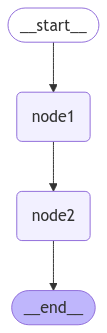

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({'prompt':'hi'})

node 1 ============= >  <class '__main__.State'>
node 2 ============= >  <class '__main__.State'>


{'prompt': 'hi I am happy!'}

#**Task: In Nodes Use LLM == GoogleChatModel in Langchain**

In [ ]:
%pip install -q -U langchain langchain-google-genai

In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model = 'gemini-1.5-flash',
    api_key = GEMINI_API_KEY,
    temreature = 2

)

llm

ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7af9998352d0>, default_metadata=())

In [ ]:
from langchain_core.messages.ai import AIMessage

ai_msg : AIMessage = llm.invoke("HI")

ai_msg

AIMessage(content='Hi there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-5dac72b5-9daa-4822-aaaf-5aa0ab707dea-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

In [ ]:
type(ai_me)

str